In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Linear Regression

In [2]:
#Read diabetes dataset
diabetes = datasets.load_diabetes()

#split the train/test dataset
train_x,test_x,train_y,test_y = train_test_split(diabetes.data, diabetes.target, test_size = 0.1 , random_state = 2019)

#build a linear regression model
regr = linear_model.LinearRegression()
#train the linear regression model
regr.fit(train_x,train_y)

#predict the result
prediction = regr.predict(test_x)

#measure the error
mean_squared_error(prediction, test_y)

3546.657941607804

In [3]:
print(f' Linear regression coefficients : {regr.coef_} ')

 Linear regression coefficients : [  -4.64533072 -183.27587176  545.42457602  307.97143272 -644.25638471
  429.79494741   19.85978671   34.65533001  760.80145466   25.99043256] 


## LASSO

In [4]:
#build a LASSO model
lasso = linear_model.Lasso(alpha = 1)
#train the lasso model
lasso.fit(train_x,train_y)

#predict the result
prediction = lasso.predict(test_x)

#measure the error
mean_squared_error(prediction,test_y)

4680.862536687806

In [5]:
print(f'Lasso coefficients : {lasso.coef_} ')

Lasso coefficients : [  0.           0.         358.53393849  11.95072692   0.
   0.          -0.           0.         328.64414164   0.        ] 


**Due to LASSO is using L1 regularization, so there are coefficients are decreasing to zero.**

## Ridge

In [6]:
#build a Ridge model
Ridge = linear_model.Ridge(alpha = 1)
#train the Ridge model
Ridge.fit(train_x,train_y)

#predict the result
prediction = Ridge.predict(test_x)

#measure the error
mean_squared_error(prediction,test_y)

3964.701345175894

In [8]:
print(f'Ridge coefficients : {Ridge.coef_} ')

Ridge coefficients : [  38.84145478  -65.50202663  295.09486138  193.56152888   21.12132283
  -18.32780664 -139.1846434    99.47666839  262.2704474   100.82968298] 


**The result of Ridge and LASSO was worse than normal linear regression. This means the regularization might cause the under-fitting.**

# 練習時間
請使用其他資料集 (boston, wine)，並調整不同的 alpha 來觀察模型訓練的情形。

## LASSO + Boston

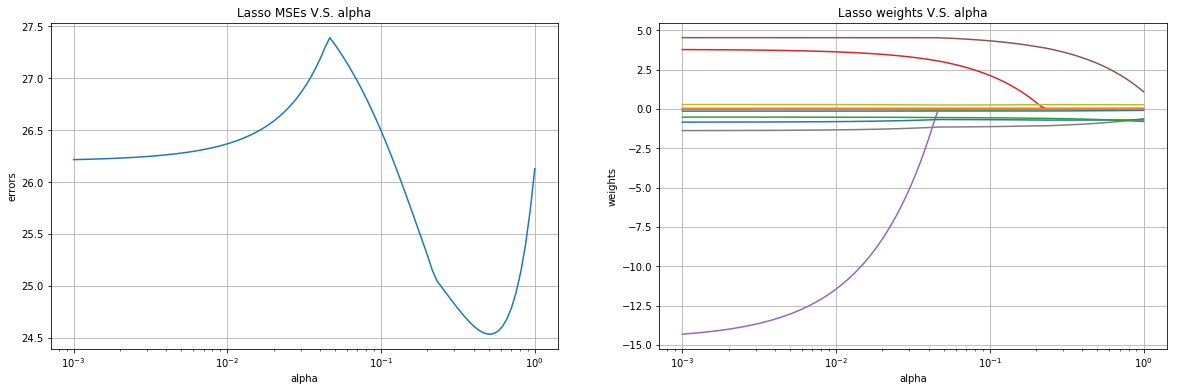

In [21]:
#load the boston dataset
boston = datasets.load_boston()

#split the train/test dataset
train_x,test_x,train_y,test_y = train_test_split(boston.data,boston.target, test_size = 0.2 , random_state = 2019)

#alpha array

alphas = np.logspace(-3, 0, 100)

#build the LASSO model
lasso = linear_model.Lasso()
coefs = []
errors = []
for alpha in alphas:
        lasso.set_params(alpha = alpha)
        lasso.fit(train_x,train_y)
        pred = lasso.predict(test_x)
        
        errors.append(mean_squared_error(test_y,pred))
        coefs.append(lasso.coef_)

plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
ax = plt.gca()
plt.plot(alphas, errors)
ax.set_xscale('log')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('errors')
plt.title('Lasso MSEs V.S. alpha')

plt.subplot(1,2,2)
ax = plt.gca()
plt.plot(alphas,coefs)
ax.set_xscale('log')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso weights V.S. alpha')
plt.show()

In [22]:
#Select the alpha which makes the smallest error
best_alpha = alphas[np.argmin(errors)]
lasso.set_params(alpha = best_alpha)
lasso.fit(train_x,train_y)
pred = lasso.predict(test_x)

#Measure the error
print('MSE : ', mean_squared_error(pred,test_y))
print(f' Lasso coefficients : {lasso.coef_} ')

MSE :  24.536151023563843
 Lasso coefficients : [-0.11503648  0.04752227 -0.02296171  0.         -0.          2.90023797
  0.01228307 -0.91220848  0.26863228 -0.01420365 -0.7064748   0.00991153
 -0.67098921] 


## Ridge + Wine

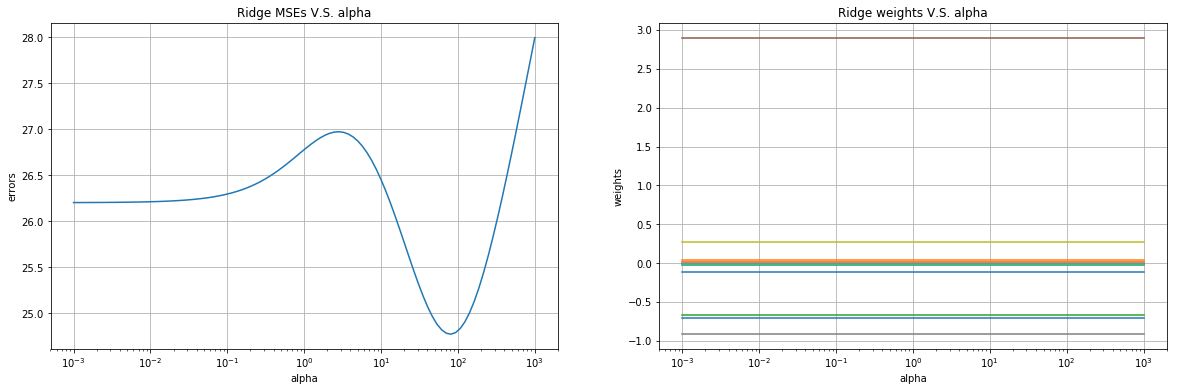

In [26]:
#alpha array
alphas = np.logspace(-3, 3, 100)
#build the Ridge model
Ridge = linear_model.Ridge()
coefs = []
errors = []
for alpha in alphas:
        Ridge.set_params(alpha = alpha)
        Ridge.fit(train_x,train_y)
        pred = Ridge.predict(test_x)
        
        errors.append(mean_squared_error(test_y,pred))
        coefs.append(lasso.coef_)

plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
ax = plt.gca()
plt.plot(alphas, errors)
ax.set_xscale('log')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('errors')
plt.title('Ridge MSEs V.S. alpha')

plt.subplot(1,2,2)
ax = plt.gca()
plt.plot(alphas,coefs)
ax.set_xscale('log')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge weights V.S. alpha')
plt.show()

In [27]:
#Select the alpha which makes the smallest error
best_alpha = alphas[np.argmin(errors)]
Ridge.set_params(alpha = best_alpha)
Ridge.fit(train_x,train_y)
pred = Ridge.predict(test_x)

#Measure the error
print('MSE : ', mean_squared_error(pred,test_y))
print(f' Lasso coefficients : {Ridge.coef_} ')

MSE :  24.77177669343461
 Lasso coefficients : [-0.13479803  0.05386839 -0.06936062  0.86669624 -0.23269868  2.51642601
  0.01051425 -1.13221819  0.30988041 -0.01461092 -0.77797836  0.00982316
 -0.69227465] 


In [28]:
#LASSO & Ridge have almost the same result
#Check out the normal linear regression 
regr.fit(train_x,train_y)
pred = regr.predict(test_x)
mean_squared_error(pred,test_y)

26.202748180423757